## Escuela Politécnica Nacional
## Métodos Numéricos
## Integrantes: 
### - Jhonn Saeteros
### - Christian Ayala

# Grafique la trayectoria de los siguientes sistemas de ecuaciones

# 1) $x_1+x_2=7$
# 2) $-2x_1+5x_2=0$
# 3) $x_0=(0,0)$
# 4) $x_0=(5,2)$
# 5) $x_1+x_2=6$
# 6) $-2x_1+x_2=0$

In [4]:
# --------------------------
# Importar funciones desde el archivo .py
# --------------------------
from iterative_methods import gauss_jacobi

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [6]:
# Sistema de ecuaciones
A = np.array([[1, 1], [-2, 5]], dtype=float)
b = np.array([[7], [0]], dtype=float)

# Condición inicial (cambia para probar divergencia)
x0 = np.array([[10.0], [-5.0]])

# Parámetros del método
tol = 1e-5
max_iter = 30

# Ejecutar el método
sol, tray = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
tray = np.array(tray).squeeze()  # (n_iter, 2)


[07-15 17:14:57][INFO] i= 0 x: [[10. -5.]]
[07-15 17:14:58][INFO] i= 1 x: [[12.  4.]]
[07-15 17:14:58][INFO] i= 2 x: [[3.  4.8]]
[07-15 17:14:58][INFO] i= 3 x: [[2.2 1.2]]
[07-15 17:14:58][INFO] i= 4 x: [[5.8  0.88]]
[07-15 17:14:58][INFO] i= 5 x: [[6.12 2.32]]
[07-15 17:14:58][INFO] i= 6 x: [[4.68  2.448]]
[07-15 17:14:58][INFO] i= 7 x: [[4.552 1.872]]
[07-15 17:14:58][INFO] i= 8 x: [[5.128  1.8208]]
[07-15 17:14:58][INFO] i= 9 x: [[5.1792 2.0512]]
[07-15 17:14:58][INFO] i= 10 x: [[4.9488  2.07168]]
[07-15 17:14:58][INFO] i= 11 x: [[4.92832 1.97952]]
[07-15 17:14:58][INFO] i= 12 x: [[5.02048  1.971328]]
[07-15 17:14:58][INFO] i= 13 x: [[5.028672 2.008192]]
[07-15 17:14:58][INFO] i= 14 x: [[4.991808  2.0114688]]
[07-15 17:14:58][INFO] i= 15 x: [[4.9885312 1.9967232]]
[07-15 17:14:58][INFO] i= 16 x: [[5.0032768  1.99541248]]
[07-15 17:14:58][INFO] i= 17 x: [[5.00458752 2.00131072]]
[07-15 17:14:58][INFO] i= 18 x: [[4.99868928 2.00183501]]
[07-15 17:14:58][INFO] i= 19 x: [[4.99816499 1.9

In [8]:
# Sistema de ecuaciones
A = np.array([[1, 1], [-2, 5]], dtype=float)
b = np.array([[7], [0]], dtype=float)

# Condición inicial (cambia para probar divergencia)
x0 = np.array([[10.0], [-5.0]])

# Parámetros del método
tol = 1e-5
max_iter = 30

# Ejecutar el método
sol, tray = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
tray = np.array(tray).squeeze()  # (n_iter, 2)


[07-15 17:15:04][INFO] i= 0 x: [[10. -5.]]
[07-15 17:15:04][INFO] i= 1 x: [[12.  4.]]
[07-15 17:15:04][INFO] i= 2 x: [[3.  4.8]]
[07-15 17:15:04][INFO] i= 3 x: [[2.2 1.2]]
[07-15 17:15:04][INFO] i= 4 x: [[5.8  0.88]]
[07-15 17:15:04][INFO] i= 5 x: [[6.12 2.32]]
[07-15 17:15:04][INFO] i= 6 x: [[4.68  2.448]]
[07-15 17:15:04][INFO] i= 7 x: [[4.552 1.872]]
[07-15 17:15:04][INFO] i= 8 x: [[5.128  1.8208]]
[07-15 17:15:04][INFO] i= 9 x: [[5.1792 2.0512]]
[07-15 17:15:04][INFO] i= 10 x: [[4.9488  2.07168]]
[07-15 17:15:04][INFO] i= 11 x: [[4.92832 1.97952]]
[07-15 17:15:04][INFO] i= 12 x: [[5.02048  1.971328]]
[07-15 17:15:04][INFO] i= 13 x: [[5.028672 2.008192]]
[07-15 17:15:04][INFO] i= 14 x: [[4.991808  2.0114688]]
[07-15 17:15:04][INFO] i= 15 x: [[4.9885312 1.9967232]]
[07-15 17:15:04][INFO] i= 16 x: [[5.0032768  1.99541248]]
[07-15 17:15:04][INFO] i= 17 x: [[5.00458752 2.00131072]]
[07-15 17:15:04][INFO] i= 18 x: [[4.99868928 2.00183501]]
[07-15 17:15:04][INFO] i= 19 x: [[4.99816499 1.9

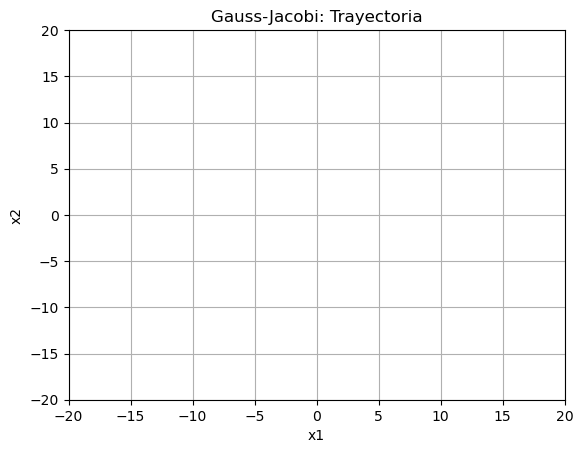

In [10]:
# Preparar animación
fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', lw=2)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_title("Gauss-Jacobi: Trayectoria")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid()

def init():
    line.set_data([], [])
    return line,

def update(i):
    line.set_data(tray[:i+1, 0], tray[:i+1, 1])
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(tray),
                              init_func=init, blit=True, interval=600, repeat=False)

plt.show()


[07-15 17:15:27][INFO] i= 0 x: [[0. 0.]]
[07-15 17:15:27][INFO] i= 1 x: [[7. 0.]]
[07-15 17:15:27][INFO] i= 2 x: [[7.  2.8]]
[07-15 17:15:27][INFO] i= 3 x: [[4.2 2.8]]
[07-15 17:15:27][INFO] i= 4 x: [[4.2  1.68]]
[07-15 17:15:27][INFO] i= 5 x: [[5.32 1.68]]
[07-15 17:15:27][INFO] i= 6 x: [[5.32  2.128]]
[07-15 17:15:27][INFO] i= 7 x: [[4.872 2.128]]
[07-15 17:15:27][INFO] i= 8 x: [[4.872  1.9488]]
[07-15 17:15:27][INFO] i= 9 x: [[5.0512 1.9488]]
[07-15 17:15:27][INFO] i= 10 x: [[5.0512  2.02048]]
[07-15 17:15:27][INFO] i= 11 x: [[4.97952 2.02048]]
[07-15 17:15:27][INFO] i= 12 x: [[4.97952  1.991808]]
[07-15 17:15:27][INFO] i= 13 x: [[5.008192 1.991808]]
[07-15 17:15:27][INFO] i= 14 x: [[5.008192  2.0032768]]
[07-15 17:15:27][INFO] i= 15 x: [[4.9967232 2.0032768]]
[07-15 17:15:27][INFO] i= 16 x: [[4.9967232  1.99868928]]
[07-15 17:15:27][INFO] i= 17 x: [[5.00131072 1.99868928]]
[07-15 17:15:27][INFO] i= 18 x: [[5.00131072 2.00052429]]
[07-15 17:15:27][INFO] i= 19 x: [[4.99947571 2.00052

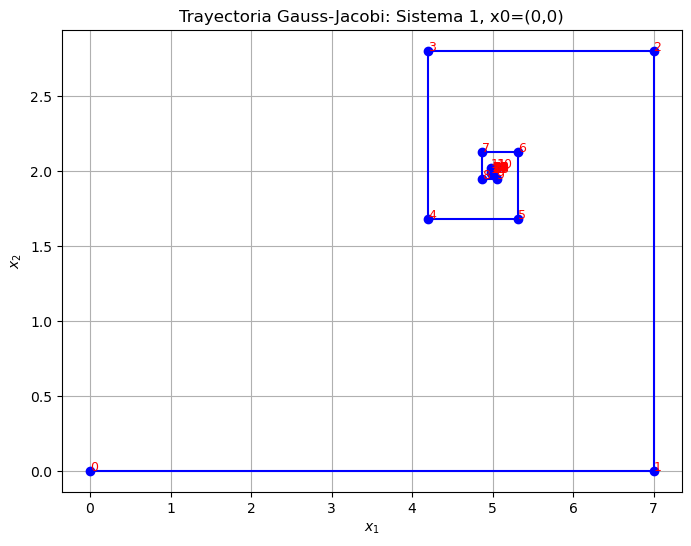

[07-15 17:15:27][INFO] i= 0 x: [[5. 2.]]


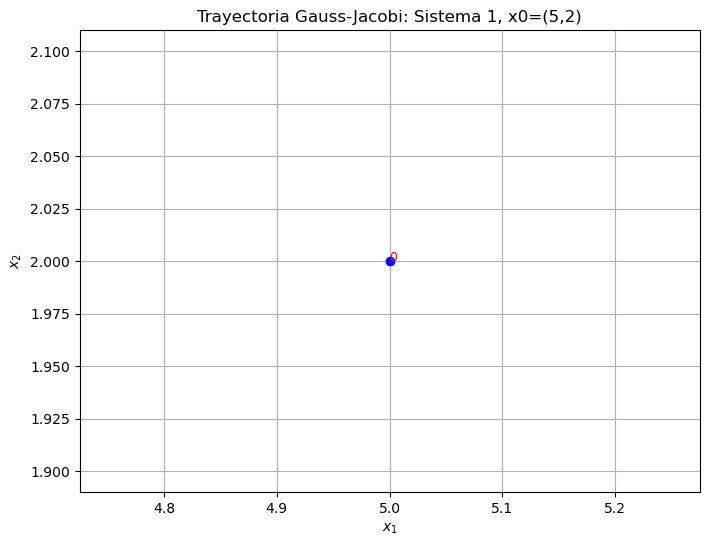

[07-15 17:15:27][INFO] i= 0 x: [[0. 0.]]
[07-15 17:15:27][INFO] i= 1 x: [[6. 0.]]
[07-15 17:15:27][INFO] i= 2 x: [[ 6. 12.]]
[07-15 17:15:27][INFO] i= 3 x: [[-6. 12.]]
[07-15 17:15:27][INFO] i= 4 x: [[ -6. -12.]]
[07-15 17:15:27][INFO] i= 5 x: [[ 18. -12.]]
[07-15 17:15:27][INFO] i= 6 x: [[18. 36.]]
[07-15 17:15:27][INFO] i= 7 x: [[-30.  36.]]
[07-15 17:15:27][INFO] i= 8 x: [[-30. -60.]]
[07-15 17:15:27][INFO] i= 9 x: [[ 66. -60.]]
[07-15 17:15:27][INFO] i= 10 x: [[ 66. 132.]]
[07-15 17:15:27][INFO] i= 11 x: [[-126.  132.]]
[07-15 17:15:27][INFO] i= 12 x: [[-126. -252.]]
[07-15 17:15:27][INFO] i= 13 x: [[ 258. -252.]]
[07-15 17:15:27][INFO] i= 14 x: [[258. 516.]]
[07-15 17:15:27][INFO] i= 15 x: [[-510.  516.]]
[07-15 17:15:27][INFO] i= 16 x: [[ -510. -1020.]]
[07-15 17:15:27][INFO] i= 17 x: [[ 1026. -1020.]]
[07-15 17:15:27][INFO] i= 18 x: [[1026. 2052.]]
[07-15 17:15:27][INFO] i= 19 x: [[-2046.  2052.]]
[07-15 17:15:27][INFO] i= 20 x: [[-2046. -4092.]]
[07-15 17:15:27][INFO] i= 21 x: 

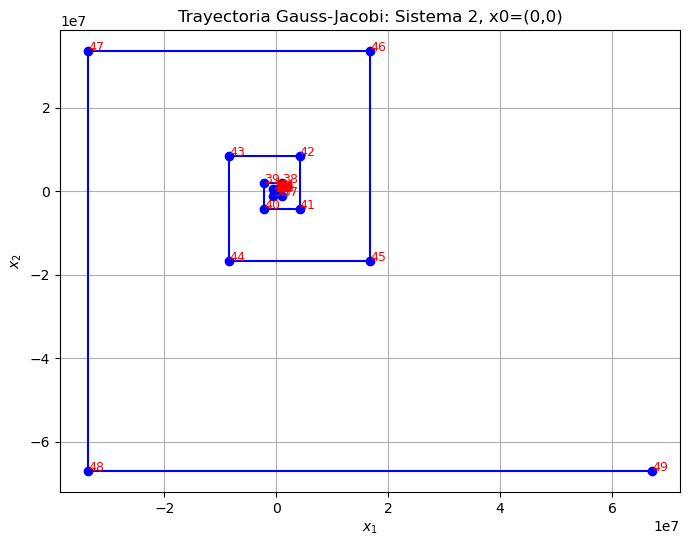

[07-15 17:15:28][INFO] i= 0 x: [[5. 2.]]
[07-15 17:15:28][INFO] i= 1 x: [[ 4. 10.]]
[07-15 17:15:28][INFO] i= 2 x: [[-4.  8.]]
[07-15 17:15:28][INFO] i= 3 x: [[-2. -8.]]
[07-15 17:15:28][INFO] i= 4 x: [[14. -4.]]
[07-15 17:15:28][INFO] i= 5 x: [[10. 28.]]
[07-15 17:15:28][INFO] i= 6 x: [[-22.  20.]]
[07-15 17:15:28][INFO] i= 7 x: [[-14. -44.]]
[07-15 17:15:28][INFO] i= 8 x: [[ 50. -28.]]
[07-15 17:15:28][INFO] i= 9 x: [[ 34. 100.]]
[07-15 17:15:28][INFO] i= 10 x: [[-94.  68.]]
[07-15 17:15:28][INFO] i= 11 x: [[ -62. -188.]]
[07-15 17:15:28][INFO] i= 12 x: [[ 194. -124.]]
[07-15 17:15:28][INFO] i= 13 x: [[130. 388.]]
[07-15 17:15:28][INFO] i= 14 x: [[-382.  260.]]
[07-15 17:15:28][INFO] i= 15 x: [[-254. -764.]]
[07-15 17:15:28][INFO] i= 16 x: [[ 770. -508.]]
[07-15 17:15:28][INFO] i= 17 x: [[ 514. 1540.]]
[07-15 17:15:28][INFO] i= 18 x: [[-1534.  1028.]]
[07-15 17:15:28][INFO] i= 19 x: [[-1022. -3068.]]
[07-15 17:15:28][INFO] i= 20 x: [[ 3074. -2044.]]
[07-15 17:15:28][INFO] i= 21 x: [[

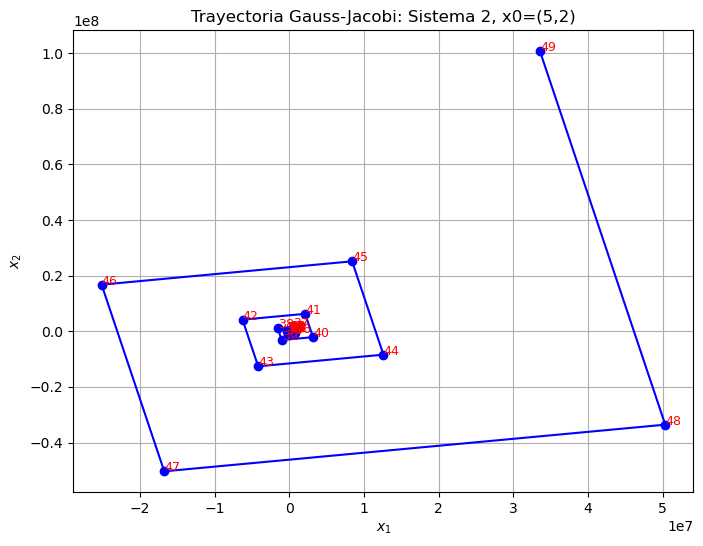

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from iterative_methods import gauss_jacobi

# Define the systems of equations using points 1 to 6
# System 1:
# x1 + x2 = 7
# -2x1 + 5x2 = 0
A1 = np.array([[1, 1],
               [-2, 5]], dtype=float)
b1 = np.array([[7],
               [0]], dtype=float)

# System 2:
# x1 + x2 = 6
# -2x1 + x2 = 0
A2 = np.array([[1, 1],
               [-2, 1]], dtype=float)
b2 = np.array([[6],
               [0]], dtype=float)

# Initial points
x0_1 = np.array([[0], [0]], dtype=float)
x0_2 = np.array([[5], [2]], dtype=float)

tol = 1e-6
max_iter = 50

def plot_trajectory(A, b, x0, title):
    x_sol, trajectory = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
    trajectory = np.hstack(trajectory).T  # Convert list of vectors to matrix for plotting
    
    plt.figure(figsize=(8, 6))
    plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', linestyle='-', color='b')
    for i, (x, y) in enumerate(zip(trajectory[:, 0], trajectory[:, 1])):
        plt.text(x, y, f'{i}', fontsize=9, color='red')
    plt.title(title)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.grid(True)
    plt.show()

# Plot for system 1 with both initial points
plot_trajectory(A1, b1, x0_1, 'Trayectoria Gauss-Jacobi: Sistema 1, x0=(0,0)')
plot_trajectory(A1, b1, x0_2, 'Trayectoria Gauss-Jacobi: Sistema 1, x0=(5,2)')

# Plot for system 2 with both initial points
plot_trajectory(A2, b2, x0_1, 'Trayectoria Gauss-Jacobi: Sistema 2, x0=(0,0)')
plot_trajectory(A2, b2, x0_2, 'Trayectoria Gauss-Jacobi: Sistema 2, x0=(5,2)')
